# Declaring the Model

In [ ]:
!pip install --upgrade optimum onnxruntime-gpu

In [ ]:
# 역자 추가 코드
# 런타임 1분 소요
!pip install transformers
!pip install datasets
!pip install torch
!pip install torchtext
!pip install onnx
!pip install onnxruntime
#!pip install optimum
!pip install fastapi[all]
!pip install uvicorn[standard]

In [ ]:
# 별도로 설치하는 경우가 있어서 추가로 위의 설치 코드 일부를 분리
! pip install onnx
! pip install onnxruntime
! pip install optimum

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)   # 입력 이미지 채널 3(RGB), 출력 이미지 채널 6, 5x5 커널
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)   # 5*5 이미지 차원 포함
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # 출력으로 10개의 클래스를 상정

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)  # 완전 연결 층 연결 전에 텐서 차원 변경
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 인스턴스화
model = SimpleCNN()


# Saving the state_dict

In [ ]:
# 모델의 state_dict 저장
torch.save(model.state_dict(), "simple_cnn_state_dict.pt")


# Loading the Model
1. You must "Create a new model object" before loading the state_dict

In [ ]:
# 새로운 모델 객체 생성
model2 = SimpleCNN()

# state_dict를 모델로 불러오기
model2.load_state_dict(torch.load("simple_cnn_state_dict.pt"))


<ipython-input-6-fa2ec135eb51>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load("simple_cnn_state_dict.pt"))


<All keys matched successfully>

In [ ]:
### 역자 추가 코드 (원서에는 있으나 iypnb 파일에 누락된 코드를 추가함)
model2.eval()

SimpleCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

# Printing the State Dict

In [ ]:
# 모델의 state_dict 출력
print("Model's state_dict:")
for param_tensor in model2.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])


# 역자 추가 코드

In [ ]:
### 역자 추가 코드: 책 15.2.2의 코드를 독자의 편의를 위해 여기 추가해 두었습니다.
### 이 코드는 원서 본문에서 예시를 든 코드로서 실제로 이 ipynb 파일의 타 코드와 호환되지 않습니다.
"""
torch.save({'first_model_state': model1.state_dict(),
            'second_model_state': model2.state_dict(),
            'first_optimizer_state': optimizer1.state_dict(),
            'second_optimizer_state': optimizer2.state_dict(),
            # ...(기타 states 추가 가능)...
            }, file_path)
"""

In [ ]:
### 역자 추가 코드: 책 15.2.2의 코드를 독자의 편의를 위해 여기 추가해 두었습니다.
### 이 코드는 원서 본문에서 예시를 든 코드로서 실제로 이 ipynb 파일의 타 코드와 호환되지 않습니다.

"""
# 모델 및 옵티마이저 초기화
model1 = Model1Class(*args, **kwargs)
model2 = Model2Class(*args, **kwargs)
optimizer1 = Optimizer1Class(*args, **kwargs)
optimizer2 = Optimizer2Class(*args, **kwargs)

# 파일로부터 states 불러오기
saved_states = torch.load(file_path)
model1.load_state_dict(saved_states['first_model_state'])
model2.load_state_dict(saved_states['second_model_state'])
optimizer1.load_state_dict(saved_states['first_optimizer_state'])
optimizer2.load_state_dict(saved_states['second_optimizer_state'])

# eval 모드나 train 모드로 변경
model1.eval()  # or model1.train()
model2.eval()  # or model2.train()
"""

# Exporting Model on ONNX Format

In [ ]:
import torch
import torchvision

dummy_input = torch.randn(1, 3, 224, 224)
model = torchvision.models.alexnet(pretrained=True)
torch.onnx.export(model, dummy_input, "model.onnx")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# 추론
import onnxruntime
import numpy as np

ort_session = onnxruntime.InferenceSession('model.onnx')

# ONNX 런타임 출력 예측
ort_inputs = {ort_session.get_inputs()[0].name: np.random.randn(1,3,224,224).astype(np.float32)}
ort_outs = ort_session.run(None, ort_inputs)

# Exporting Transformers Model to ONNX format

In [ ]:
# 런타임 1분 소요
from optimum.onnxruntime import ORTModelForCausalLM
from transformers import AutoTokenizer

model_checkpoint = "gpt2"
#save_directory = "onnx/"
save_directory = "/content/onnx"


# transforemrs 라이브러리에서 모델을 불러와서 이를 ONNX로 내보내기(export)
ort_model = ORTModelForCausalLM.from_pretrained(model_checkpoint, export=True)
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

# ONNX 모델 및 토크나이저 저장
ort_model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

/usr/local/lib/python3.10/dist-packages/transformers/modeling_attn_mask_utils.py:116: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if (input_shape[-1] > 1 or self.sliding_window is not None) and self.is_causal:
/usr/local/lib/python3.10/dist-packages/optimum/exporters/onnx/model_patcher.py:306: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if past_key_values_length > 0:
Found different candidate ONNX initializers (likely duplicate) for the tied weights:
	lm_head.weight: {'onnx::MatMul_3329'}
	transformer.wte.weight: {'transformer.wte.weight'}


('/content/onnx/tokenizer_config.json',
 '/content/onnx/special_tokens_map.json',
 '/content/onnx/vocab.json',
 '/content/onnx/merges.txt',
 '/content/onnx/added_tokens.json',
 '/content/onnx/tokenizer.json')

# Using for Inference

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
torch.cuda.is_available()

True

In [ ]:
### 역자 주: 원서 코드를 GPU로 연산 시 에러가 발생하여
###        CPU로만 연산하도록 변경
from transformers import AutoTokenizer, pipeline
from optimum.onnxruntime import ORTModelForCausalLM

# 모델과 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained("/content/onnx")
### provoder 인자는 역자 추가 코드
model = ORTModelForCausalLM.from_pretrained("/content/onnx", provider="CPUExecutionProvider")

# 파이프라인 생성, CPU 설정
### device=-1은 역자 추가 코드
onnx_gen = pipeline("text-generation", model=model, tokenizer=tokenizer, device=-1)

# 텍스트 생성
text = "I Live in New York City. New York City is "
gen = onnx_gen(text)
print(gen)


Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I Live in New York City. New York City is \xa0the hub of every single story I write here on the web—about the amazing city, business, culture, people, and everything in between. New York City is my city. It'}]


In [ ]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
id2label={0: 'background', 1: 'candy', 2: 'egg tart', 3: 'french fries', 4: 'chocolate', 5: 'biscuit', 6: 'popcorn', 7: 'pudding', 8: 'ice cream', 9: 'cheese butter', 10: 'cake', 11: 'wine', 12: 'milkshake', 13: 'coffee', 14: 'juice', 15: 'milk', 16: 'tea', 17: 'almond', 18: 'red beans', 19: 'cashew', 20: 'dried cranberries', 21: 'soy', 22: 'walnut', 23: 'peanut', 24: 'egg', 25: 'apple', 26: 'date', 27: 'apricot', 28: 'avocado', 29: 'banana', 30: 'strawberry', 31: 'cherry', 32: 'blueberry', 33: 'raspberry', 34: 'mango', 35: 'olives', 36: 'peach', 37: 'lemon', 38: 'pear', 39: 'fig', 40: 'pineapple', 41: 'grape', 42: 'kiwi', 43: 'melon', 44: 'orange', 45: 'watermelon', 46: 'steak', 47: 'pork', 48: 'chicken duck', 49: 'sausage', 50: 'fried meat', 51: 'lamb', 52: 'sauce', 53: 'crab', 54: 'fish', 55: 'shellfish', 56: 'shrimp', 57: 'soup', 58: 'bread', 59: 'corn', 60: 'hamburg', 61: 'pizza', 62: ' hanamaki baozi', 63: 'wonton dumplings', 64: 'pasta', 65: 'noodles', 66: 'rice', 67: 'pie', 68: 'tofu', 69: 'eggplant', 70: 'potato', 71: 'garlic', 72: 'cauliflower', 73: 'tomato', 74: 'kelp', 75: 'seaweed', 76: 'spring onion', 77: 'rape', 78: 'ginger', 79: 'okra', 80: 'lettuce', 81: 'pumpkin', 82: 'cucumber', 83: 'white radish', 84: 'carrot', 85: 'asparagus', 86: 'bamboo shoots', 87: 'broccoli', 88: 'celery stick', 89: 'cilantro mint', 90: 'snow peas', 91: ' cabbage', 92: 'bean sprouts', 93: 'onion', 94: 'pepper', 95: 'green beans', 96: 'French beans', 97: 'king oyster mushroom', 98: 'shiitake', 99: 'enoki mushroom', 100: 'oyster mushroom', 101: 'white button mushroom', 102: 'salad', 103: 'other ingredients'}
label2id={'background': 0, 'candy': 1, 'egg tart': 2, 'french fries': 3, 'chocolate': 4, 'biscuit': 5, 'popcorn': 6, 'pudding': 7, 'ice cream': 8, 'cheese butter': 9, 'cake': 10, 'wine': 11, 'milkshake': 12, 'coffee': 13, 'juice': 14, 'milk': 15, 'tea': 16, 'almond': 17, 'red beans': 18, 'cashew': 19, 'dried cranberries': 20, 'soy': 21, 'walnut': 22, 'peanut': 23, 'egg': 24, 'apple': 25, 'date': 26, 'apricot': 27, 'avocado': 28, 'banana': 29, 'strawberry': 30, 'cherry': 31, 'blueberry': 32, 'raspberry': 33, 'mango': 34, 'olives': 35, 'peach': 36, 'lemon': 37, 'pear': 38, 'fig': 39, 'pineapple': 40, 'grape': 41, 'kiwi': 42, 'melon': 43, 'orange': 44, 'watermelon': 45, 'steak': 46, 'pork': 47, 'chicken duck': 48, 'sausage': 49, 'fried meat': 50, 'lamb': 51, 'sauce': 52, 'crab': 53, 'fish': 54, 'shellfish': 55, 'shrimp': 56, 'soup': 57, 'bread': 58, 'corn': 59, 'hamburg': 60, 'pizza': 61, ' hanamaki baozi': 62, 'wonton dumplings': 63, 'pasta': 64, 'noodles': 65, 'rice': 66, 'pie': 67, 'tofu': 68, 'eggplant': 69, 'potato': 70, 'garlic': 71, 'cauliflower': 72, 'tomato': 73, 'kelp': 74, 'seaweed': 75, 'spring onion': 76, 'rape': 77, 'ginger': 78, 'okra': 79, 'lettuce': 80, 'pumpkin': 81, 'cucumber': 82, 'white radish': 83, 'carrot': 84, 'asparagus': 85, 'bamboo shoots': 86, 'broccoli': 87, 'celery stick': 88, 'cilantro mint': 89, 'snow peas': 90, ' cabbage': 91, 'bean sprouts': 92, 'onion': 93, 'pepper': 94, 'green beans': 95, 'French beans': 96, 'king oyster mushroom': 97, 'shiitake': 98, 'enoki mushroom': 99, 'oyster mushroom': 100, 'white button mushroom': 101, 'salad': 102, 'other ingredients': 103}
feature_extractor = SegformerFeatureExtractor()
model = SegformerForSemanticSegmentation.from_pretrained(
    "prem-timsina/segformer-b0-finetuned-food",
    id2label=id2label,
    label2id=label2id
)

/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/5.36k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

In [ ]:
import torch
import numpy as np
from PIL import Image
from torchvision.transforms.functional import to_pil_image
from transformers import SegformerFeatureExtractor
from matplotlib import pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# 피처 추출기 불러오기
url = 'https://raw.githubusercontent.com/bpbpublications/Building-Transformer-Models-with-PyTorch/main/chapter8_CVTask/food_image.jpg'
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert("RGB")

inputs = feature_extractor(images=[image], return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
    predictions = outputs.logits.argmax(dim=1).squeeze().cpu().numpy()
grayscale_map = np.zeros((predictions.shape[0], predictions.shape[1]), dtype=np.uint8)
for label_id in id2label.keys():
    grayscale_map[predictions == label_id] = label_id

# 흑백(회색조) 맵을 PIL 이미지로 변환
segmentation_image = Image.fromarray(grayscale_map, mode='L')


In [ ]:
# 이미지의 각 클래스 개수 용도의 딕셔너리 생성
unique, counts = np.unique(predictions, return_counts=True)
class_counts = dict(zip(unique, counts))

# 클래스 IDs를 (원래) 이름으로 매핑
class_counts = {id2label[k]: v for k, v in class_counts.items()}

print(class_counts)


{'background': 3929, 'chicken duck': 3950, 'corn': 2, 'rice': 6153, 'asparagus': 314, 'cilantro mint': 156, 'French beans': 1880}


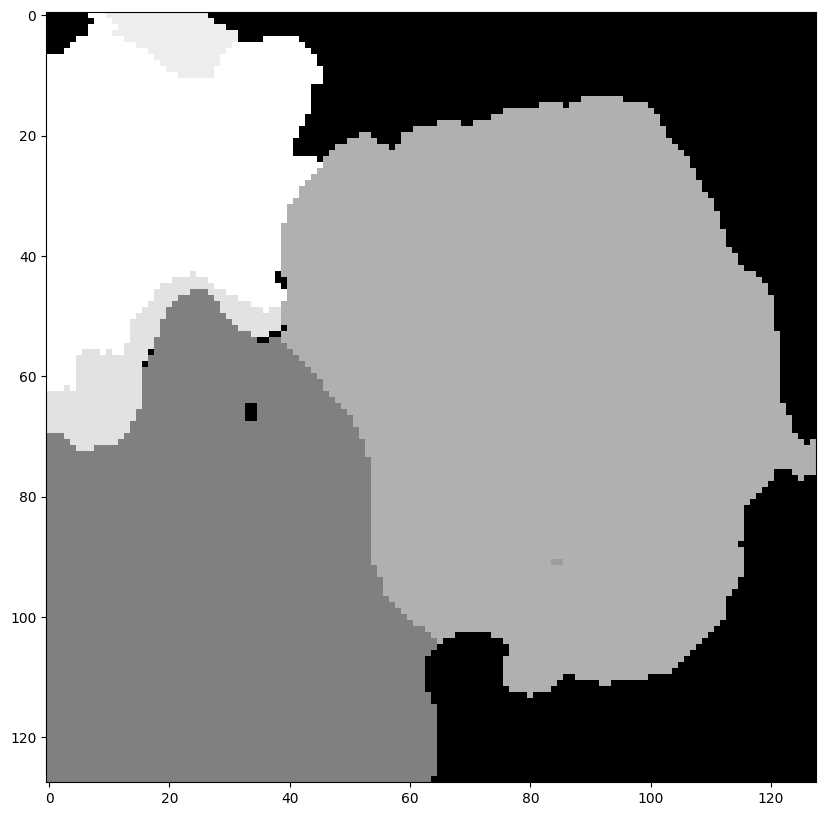

In [ ]:
import matplotlib.pyplot as plt

# 이미지 디스플렝이
plt.figure(figsize=(10,10))
plt.imshow(segmentation_image, cmap='gray')
plt.show()


# 역자 추가 코드

In [ ]:
# 역자 추가 코드: 15.6.1절 원서 책의 코드가 코드집에 수록돼 있지 않아서
# 독자의 편의를 위해 여기 추가합니다.
# 다만, 여기서부터 후속 코드 블록 실행은 책의 범위를 벗어나 본문의 설명으로만 대체하겠습니다.

from sagemaker.huggingface import HuggingFaceModel

huggingface_model = HuggingFaceModel(
    # 학습된 모델이 저장된 S3 경로
    model_data='s3://my-bucket/path/model.tar.gz',

    # AWS 서비스가 특정 작업을 수행할 수 있도록 권한을 부여
    role='MySageMakerRole',

    # Transformers 파이브러리 버전 정보
    transformers_version='4.6',

    # 파이토치 버전 정보
    pytorch_version='2.0',

    # 파이썬 버전 정보
    py_version='py3'
)

In [ ]:
# 역자 추가 코드: 15.6.1절 원서 책의 코드가 코드집에 수록돼 있지 않아서
# 독자의 편의를 위해 여기 추가합니다.
# 다만, 여기서부터 후속 코드 블록 실행은 책의 범위를 벗어나 본문의 설명으로만 대체하겠습니다.

predictor = huggingface_model.deploy(
    initial_instance_count=1,
    instance_type='ml.m5.large'
)

In [ ]:
# 역자 추가 코드: 15.6.1절 원서 책의 코드가 코드집에 수록돼 있지 않아서
# 독자의 편의를 위해 여기 추가합니다.
# 다만, 여기서부터 후속 코드 블록 실행은 책의 범위를 벗어나 본문의 설명으로만 대체하겠습니다.

result = predictor.predict("Hello, world!")